<a href="https://colab.research.google.com/github/blackfox2001/bmstu/blob/master/tmo2022/laba6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 6**

## Задание

Выберите набор данных (датасет) для решения задачи прогнозирования временного ряда.

Визуализируйте временной ряд и его основные характеристики.

Разделите временной ряд на обучающую и тестовую выборку.

Произведите прогнозирование временного ряда с использованием как минимум двух методов.

Визуализируйте тестовую выборку и каждый из прогнозов.

Оцените качество прогноза в каждом случае с помощью метрик.

## Выбор и загрузка данных

Возьмем датасет с данными о рождаемости мужчин и женщин в определенную дату. 

year - год;

month - месяц;

day - день;

gender - пол;

births - количество родившихся.

Импортируем библиотеки

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline
sns.set(style="ticks")

Загружаем данные

In [105]:
files.upload()

Saving births.csv to births (2).csv


{'births.csv': b'year,month,day,gender,births\n1969,1,1,F,4046\n1969,1,1,M,4440\n1969,1,2,F,4454\n1969,1,2,M,4548\n1969,1,3,F,4548\n1969,1,3,M,4994\n1969,1,4,F,4440\n1969,1,4,M,4520\n1969,1,5,F,4192\n1969,1,5,M,4198\n1969,1,6,F,4710\n1969,1,6,M,4850\n1969,1,7,F,4646\n1969,1,7,M,5092\n1969,1,8,F,4800\n1969,1,8,M,4934\n1969,1,9,F,4592\n1969,1,9,M,4842\n1969,1,10,F,4852\n1969,1,10,M,5190\n1969,1,11,F,4580\n1969,1,11,M,4598\n1969,1,12,F,4126\n1969,1,12,M,4324\n1969,1,13,F,4758\n1969,1,13,M,5076\n1969,1,14,F,5070\n1969,1,14,M,5296\n1969,1,15,F,4798\n1969,1,15,M,5096\n1969,1,16,F,4790\n1969,1,16,M,4872\n1969,1,17,F,4944\n1969,1,17,M,5030\n1969,1,18,F,4670\n1969,1,18,M,4642\n1969,1,19,F,4170\n1969,1,19,M,4452\n1969,1,20,F,4884\n1969,1,20,M,4924\n1969,1,21,F,5042\n1969,1,21,M,5432\n1969,1,22,F,4796\n1969,1,22,M,5088\n1969,1,23,F,4794\n1969,1,23,M,4660\n1969,1,24,F,4752\n1969,1,24,M,5046\n1969,1,25,F,4348\n1969,1,25,M,4674\n1969,1,26,F,4230\n1969,1,26,M,4338\n1969,1,27,F,4864\n1969,1,27,M,5046\

In [186]:
data = pd.read_csv('births.csv')

## Первичный анализ

Первые 5 строк датасета:

In [187]:
data.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


Определим размер датасета:

In [188]:
data.shape

(15547, 5)

Определим типы данных:

In [189]:
data.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
dtype: object

## Удаление записей

Удалим несуществующий в реальности день

In [190]:
data = data.loc[data['day'] != 99]

Очистим записи с пустыми ячейками

In [192]:
data.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [193]:
data = data.dropna(axis=0, how='any')

In [194]:
data.isnull().sum()

year      0
month     0
day       0
gender    0
births    0
dtype: int64

Анализировать будем рождаемость мальчиков, поэтому уберем все строки с данными о рождаемости девочек.

In [195]:
data = data.loc[data['gender'] != 'F']

In [196]:
data.head()

,year,month,day,gender,births
1,1969,1,1.0,M,4440
3,1969,1,2.0,M,4548
5,1969,1,3.0,M,4994
7,1969,1,4.0,M,4520
9,1969,1,5.0,M,4198


In [197]:
data = data.astype({"day": "Int64"})

In [198]:
data.dtypes

year       int64
month      int64
day        Int64
gender    object
births     int64
dtype: object

Чтобы не было переизбытка данных, удалим некоторые так, чтобы осталось около тысячи записей. (даты удаляем, поскольку часто появляются несуществующие в месяце "февраль", а года - чтобы сократить количество записей и как следствие - время для анализа)

In [199]:
data = data.loc[data['day'] != 29]

In [200]:
data = data.loc[data['day'] != 30]

In [201]:
data = data.loc[data['day'] != 31]

In [204]:
data = data.loc[data['year'] != 1988]

In [205]:
data = data.loc[data['year'] != 1987]

In [206]:
data = data.loc[data['year'] != 1986]

In [207]:
data = data.loc[data['year'] != 1985]

In [208]:
data = data.loc[data['year'] != 1984]

In [209]:
data = data.loc[data['year'] != 1983]

In [210]:
data = data.loc[data['year'] != 1982]

In [211]:
data = data.loc[data['year'] != 1981]

In [212]:
data = data.loc[data['year'] != 1980]

In [213]:
data = data.loc[data['year'] != 1979]

In [214]:
data = data.loc[data['year'] != 1978]

In [215]:
data = data.loc[data['year'] != 1976]

In [216]:
data = data.loc[data['year'] != 1977]

In [217]:
data = data.loc[data['year'] != 1975]

In [218]:
data = data.loc[data['year'] != 1974]

In [219]:
data = data.loc[data['year'] != 1973]

In [220]:
data

,year,month,day,gender,births
1,1969,1,1,M,4440
3,1969,1,2,M,4548
5,1969,1,3,M,4994
7,1969,1,4,M,4520
9,1969,1,5,M,4198
...,...,...,...,...,...
3048,1972,12,24,M,3766
3050,1972,12,25,M,3655
3052,1972,12,26,M,4454
3054,1972,12,27,M,5130


## Столбец с датой

Создадим ячейку даты

In [221]:
data["date"] = data["year"].astype(str) + "/" + data["month"].astype(str) + '/' + data["day"].astype(str)

Изменим формат

In [222]:
data['date'] = pd.to_datetime(data['date'])

In [223]:
data

,year,month,day,gender,births,date
1,1969,1,1,M,4440,1969-01-01
3,1969,1,2,M,4548,1969-01-02
5,1969,1,3,M,4994,1969-01-03
7,1969,1,4,M,4520,1969-01-04
9,1969,1,5,M,4198,1969-01-05
...,...,...,...,...,...,...
3048,1972,12,24,M,3766,1972-12-24
3050,1972,12,25,M,3655,1972-12-25
3052,1972,12,26,M,4454,1972-12-26
3054,1972,12,27,M,5130,1972-12-27


Удалим столбцы, которые не понадобятся для анализа

In [224]:
data = data.drop(['year','month', 'day', 'gender'],axis=1)

Сделаем дату индексом

In [226]:
data.set_index('date',inplace=True)
data.head()

,births
date,
1969-01-01,4440
1969-01-02,4548
1969-01-03,4994
1969-01-04,4520
1969-01-05,4198


## Визуализация временного ряда


In [228]:
import matplotlib.pyplot as pyplot

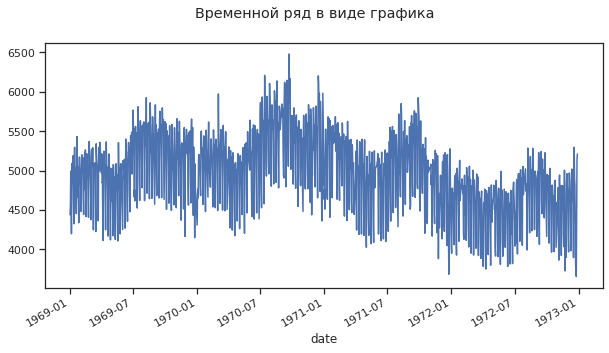

In [229]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
data.plot(ax=ax, legend=False)
pyplot.show()

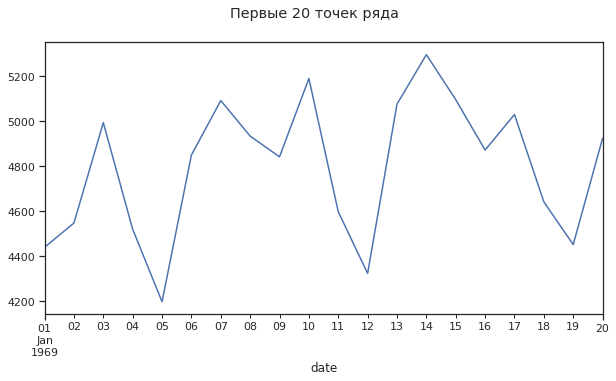

In [230]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Первые 20 точек ряда')
data[:20].plot(ax=ax, legend=False)
pyplot.show()

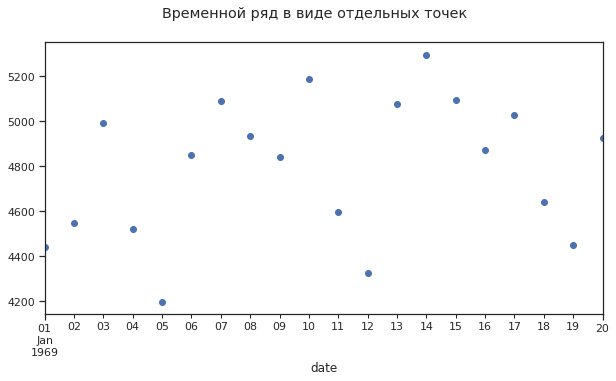

In [231]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде отдельных точек')
data[:20].plot(ax=ax, legend=False, style='bo')
pyplot.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


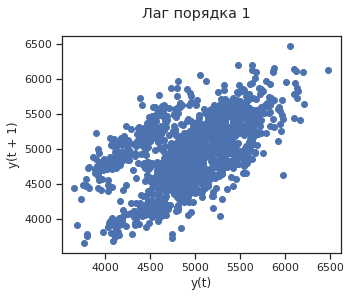

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


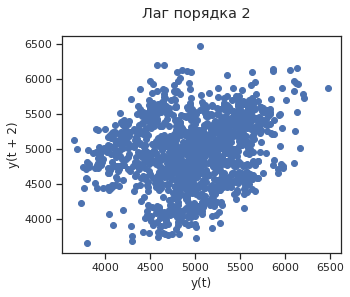

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


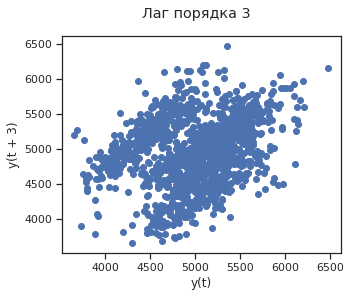

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


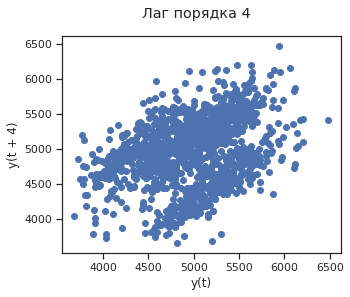

In [232]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(data, lag=i, ax=ax)
    pyplot.show()

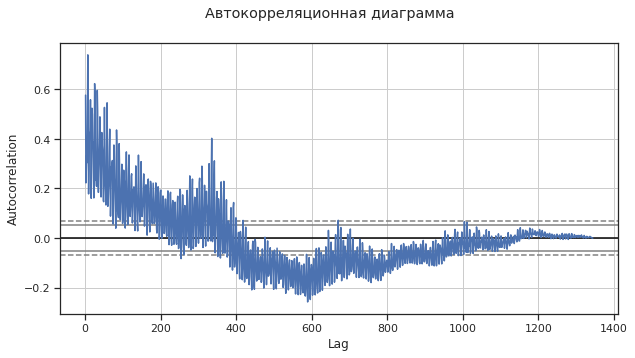

In [233]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(data, ax=ax)
pyplot.show()

## Автокорреляционная функция

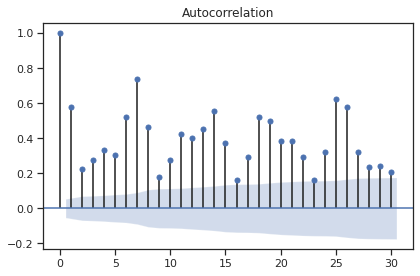

In [234]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data, lags=30)
plt.tight_layout()

## Частичная автокорреляционная функция

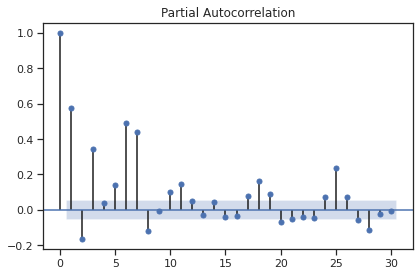

In [235]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data, lags=30)
plt.tight_layout()

## Разделение временного ряда на обучающую и тестовую выборку

In [236]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [237]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [245]:
data_2 = data.copy()

In [247]:
# Целочисленная метка шкалы времени 
xnum = list(range(data_2.shape[0]))
# Разделение выборки на обучающую и тестовую
Y = data_2['births'].values
train_size = int(len(Y) * 0.7)
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]
history_arima = [x for x in train]

## Прогнозирование временного ряда авторегрессионным методом (ARIMA)

In [248]:
# Параметры модели (p,d,q) 
arima_order = (2,1,0)
# Формирование предсказаний
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test[t])
# Вычисление метрики RMSE
error_arima = mean_squared_error(test, predictions_arima, squared=False)

In [249]:
# Ошибка прогноза
np.mean(Y), error_arima

(4970.4077380952385, 363.8965630721177)

In [250]:
# Записываем предсказания в DataFrame
data_2['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)

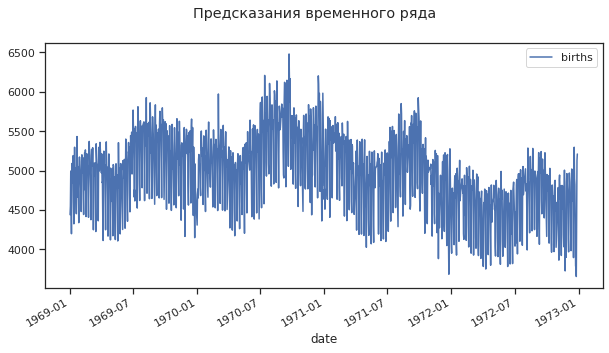

In [251]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда')
data_2.plot(ax=ax, legend=True)
pyplot.show()

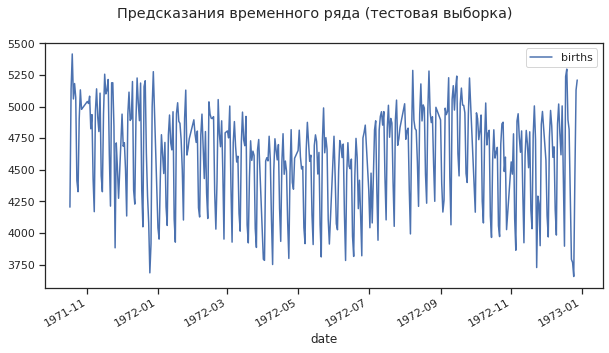

In [252]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
data_2[train_size:].plot(ax=ax, legend=True)
pyplot.show()

## Прогнозирование временного ряда методом символьной регресии

In [255]:
!pip install gplearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [256]:
from gplearn.genetic import SymbolicRegressor

In [257]:
function_set = ['add', 'sub', 'mul', 'div', 'sin']
SR = SymbolicRegressor(population_size=500, metric='mse',
                               generations=70, stopping_criteria=0.01,
                               init_depth=(4, 10), verbose=1, function_set=function_set,
                               const_range=(-100, 100), random_state=0)

In [258]:
SR.fit(np.array(xnum_train).reshape(-1, 1), train.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   263.65      3.57846e+67       99      1.17265e+06              N/A     12.08m
   1   148.21      4.00929e+17       34           353379              N/A      4.34m
   2   100.86      2.99321e+15      106           319473              N/A      3.42m
   3    82.77      1.77505e+13       99           315705              N/A      1.56m
   4    76.34       3.5795e+08       49           192735              N/A      1.85m
   5    98.30      7.31725e+08       49           186285              N/A      2.26m
   6    87.44      6.74573e+07       35           184496              N/A      2.06m
   7    60.95       2.4276e+08       73           179640              N/A      1.81m
   8    56.52      7.28025e+08       73           179139              N/A  

SymbolicRegressor(const_range=(-100, 100),
                  function_set=['add', 'sub', 'mul', 'div', 'sin'],
                  generations=70, init_depth=(4, 10), metric='mse',
                  population_size=500, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [259]:
print(SR._program)

add(add(sub(sub(div(sub(sub(65.225, -79.669), sub(X0, 35.398)), div(add(mul(-12.995, -55.996), mul(-12.995, -55.996)), add(X0, X0))), sub(mul(42.876, -97.063), sub(X0, sub(div(mul(-12.995, -55.996), -12.995), add(div(X0, 65.225), add(div(X0, 65.225), add(sub(X0, X0), add(div(X0, 65.225), div(X0, 65.225))))))))), sub(div(add(add(mul(42.876, -97.063), sub(sub(-40.382, -79.669), sub(sub(add(div(sub(sub(-40.382, -79.669), sub(X0, 35.398)), div(add(X0, mul(-12.995, -55.996)), add(X0, X0))), sub(65.225, -79.669)), div(sub(sub(-40.382, -79.669), sub(X0, 35.398)), div(add(X0, X0), add(X0, X0)))), sub(mul(-12.995, -55.996), sub(add(div(sub(add(sub(sub(add(div(mul(42.876, -97.063), div(add(X0, mul(-12.995, -55.996)), sub(mul(42.876, -97.063), sub(X0, sub(div(mul(-12.995, -55.996), -12.995), add(div(sub(X0, 35.398), -12.995), add(div(X0, sub(div(add(add(mul(42.876, -97.063), sub(sub(-40.382, -79.669), add(add(add(div(X0, 65.225), add(sub(X0, X0), add(div(X0, 65.225), div(X0, 65.225)))), mul(-12.9

In [260]:
# Предсказания
y_sr = SR.predict(np.array(xnum_test).reshape(-1, 1))
y_sr[:10]

array([4986.45912116, 4985.25749585, 4984.05312687, 4982.84601335,
       4981.63615444, 4980.42354933, 4979.20819722, 4977.99009732,
       4976.7692489 , 4975.54565121])

In [261]:
# Записываем предсказания в DataFrame
data_2['predictions_GPLEARN'] = (train_size * [np.NAN]) + list(y_sr)

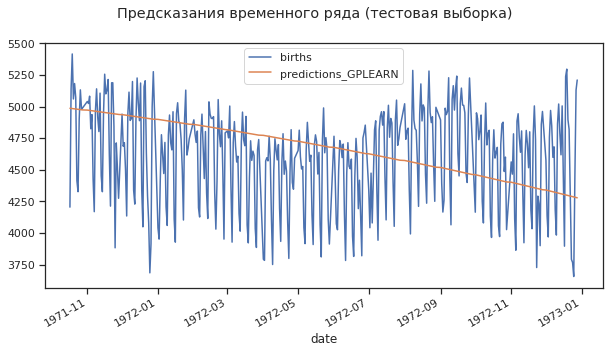

In [262]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
data_2[train_size:].plot(ax=ax, legend=True)
pyplot.show()

In [263]:
error_SR = mean_squared_error(test, y_sr, squared=False)

In [264]:
# Ошибка прогноза
np.mean(Y), error_SR

(4970.4077380952385, 427.58662432085737)

## Качество прогноза моделей

In [269]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [270]:
def print_metrics(y_test, y_pred):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred, squared=False)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

In [271]:
print("ARIMA")
print_metrics(test, predictions_arima)

print("\nGPLEARN")
print_metrics(test, y_sr)

ARIMA
R^2: 0.10525026815303329
MSE: 363.8965630721177
MAE: 293.7380334344495

GPLEARN
R^2: -0.23536101464103076
MSE: 427.58662432085737
MAE: 339.6186106097561


Вывод: Обе модели, ARIMA и GPLEARN, показали хороший результат. Лучшей по всем используемым метрикам оказалась модель ARIMA.